In [1]:
## Importar Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Ruta del archivo CSV
file_path = r"C:\Users\User\Desktop\PRINCESA\ANALISIS DE DATOS\Tarea 5 - Proyecto Análisis de datos-20241210\Titanic-Dataset.csv"

In [3]:
try:
    # Cargar el archivo CSV
    df = pd.read_csv(file_path, encoding='utf-8')  # Ajusta el encoding si es necesario
    print("Archivo cargado exitosamente.")
    
    # Mostrar las primeras filas del DataFrame
    print("Primeras filas del dataset:")
    print(df.head())
    
    # Información general del DataFrame
    print("\nInformación del dataset:")
    print(df.info())
    
    # Cantidad de registros y columnas
    print("\nTamaño del dataset:")
    print(f"Registros: {df.shape[0]}, Columnas: {df.shape[1]}")

except FileNotFoundError:
    print(f"No se encontró el archivo en la ruta especificada: {file_path}")
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")

Archivo cargado exitosamente.
Primeras filas del dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S

In [4]:
# 1. Análisis exploratorio de datos
print("\nInformación general del dataset:")
print(df.info())


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
print("\nDescripción estadística de los datos numéricos:")
print(df.describe())

print("\nNúmero de valores nulos por columna:")
print(df.isnull().sum())


Descripción estadística de los datos numéricos:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Número de valores nulos por col

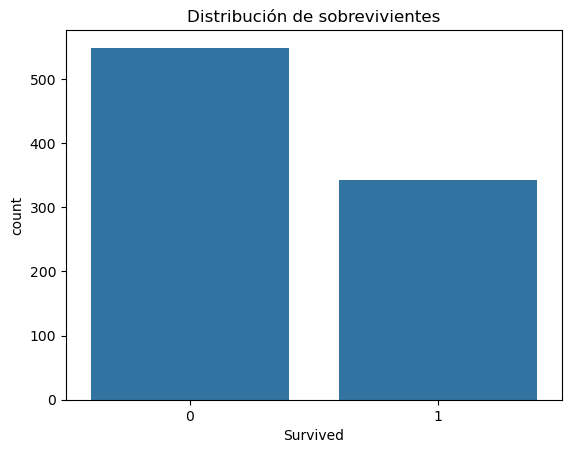

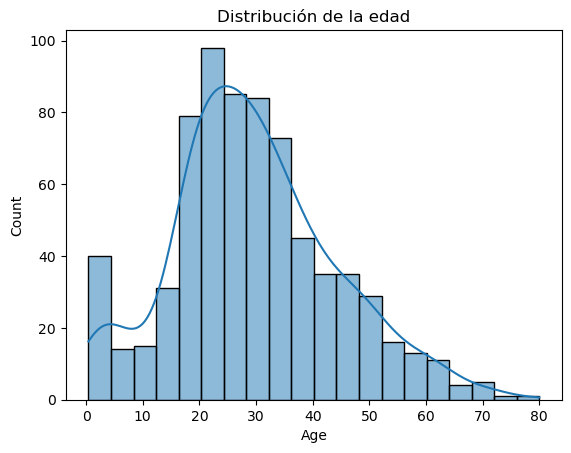

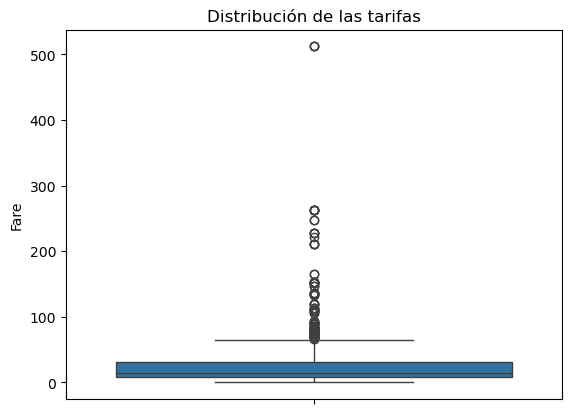

In [6]:
# Visualización de la distribución de las variables
sns.countplot(data=df, x='Survived')
plt.title("Distribución de sobrevivientes")
plt.show()

sns.histplot(data=df, x='Age', kde=True)
plt.title("Distribución de la edad")
plt.show()

sns.boxplot(data=df, y='Fare')
plt.title("Distribución de las tarifas")
plt.show()

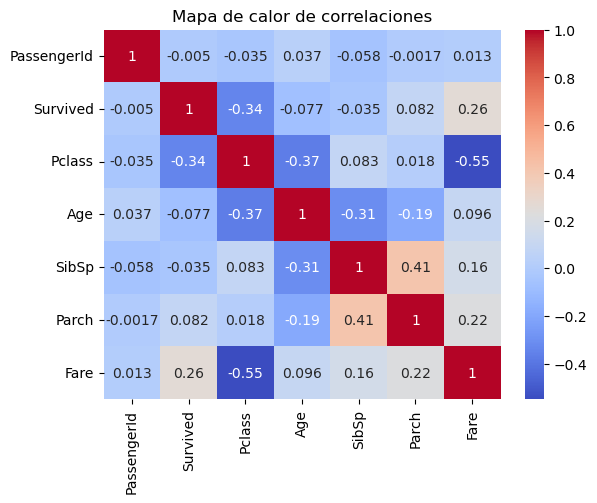

In [7]:
# Análisis de relaciones (solo para columnas numéricas)
numerical_columns = df.select_dtypes(include=[np.number])  # Seleccionar solo columnas numéricas
correlation_matrix = numerical_columns.corr()

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Mapa de calor de correlaciones")
plt.show()

In [8]:
# 2. Preprocesamiento
df['Age'].fillna(df['Age'].median(), inplace=True)  # Imputar edad con la mediana
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Imputar embarque con la moda


In [9]:
# Eliminar columnas irrelevantes
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
# Codificación de variables categóricas
label_enc = LabelEncoder()
df['Sex'] = label_enc.fit_transform(df['Sex'])
df['Embarked'] = label_enc.fit_transform(df['Embarked'])

In [12]:
print("\nDatos después del preprocesamiento:")
print(df.head())


Datos después del preprocesamiento:
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    1  22.0      1      0   7.2500         2
1            2         1       1    0  38.0      1      0  71.2833         0
2            3         1       3    0  26.0      0      0   7.9250         2
3            4         1       1    0  35.0      1      0  53.1000         2
4            5         0       3    1  35.0      0      0   8.0500         2


In [13]:
# 3. Selección de características
correlation = df.corr()['Survived'].abs().sort_values(ascending=False)
print("\nCorrelación de las características con la variable objetivo:")
print(correlation)


Correlación de las características con la variable objetivo:
Survived       1.000000
Sex            0.543351
Pclass         0.338481
Fare           0.257307
Embarked       0.167675
Parch          0.081629
Age            0.064910
SibSp          0.035322
PassengerId    0.005007
Name: Survived, dtype: float64


In [14]:
# Para simplificar, tomamos todas las características excepto 'Survived' como independientes
X = df.drop('Survived', axis=1)
y = df['Survived']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# 4. División del dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
# 5. Entrenamiento del modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [20]:
# 6. Evaluación del modelo
y_pred = model.predict(X_test)
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print("\nPrecisión del modelo:", accuracy_score(y_test, y_pred))


Matriz de confusión:
[[93 12]
 [19 55]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179


Precisión del modelo: 0.8268156424581006


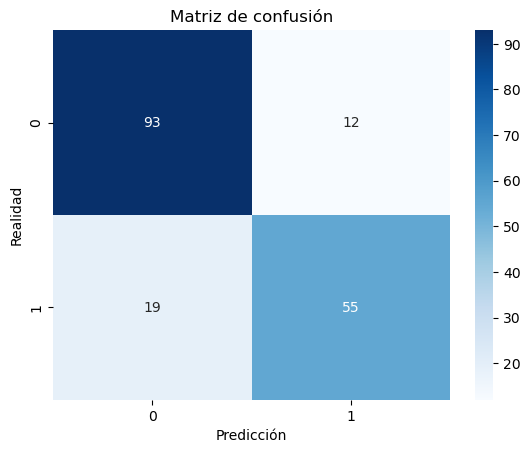

In [21]:
# 7. Visualización de resultados
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.show()

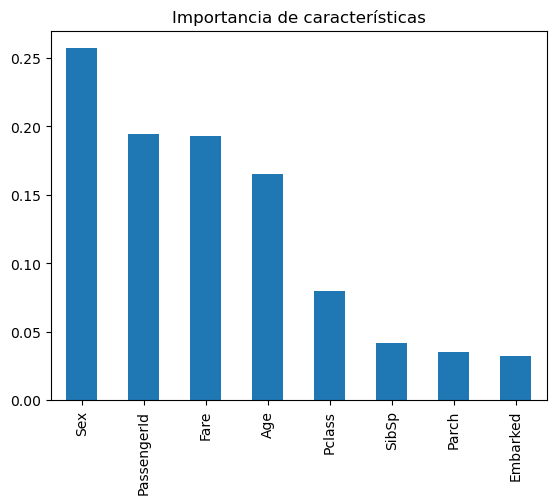

In [22]:
# Importancia de características
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance.plot(kind='bar', title='Importancia de características')
plt.show()

In [23]:
# Modelo de árbol de decisión
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

NameError: name 'DecisionTreeClassifier' is not defined

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
# Modelo de árbol de decisión
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [26]:
# Evaluación del modelo de árbol de decisión
y_dt_pred = dt_model.predict(X_test)
print("\nMatriz de confusión (Árbol de decisión):")
print(confusion_matrix(y_test, y_dt_pred))

print("\nReporte de clasificación (Árbol de decisión):")
print(classification_report(y_test, y_dt_pred))

print("\nPrecisión del modelo (Árbol de decisión):", accuracy_score(y_test, y_dt_pred))


Matriz de confusión (Árbol de decisión):
[[96  9]
 [27 47]]

Reporte de clasificación (Árbol de decisión):
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179


Precisión del modelo (Árbol de decisión): 0.7988826815642458


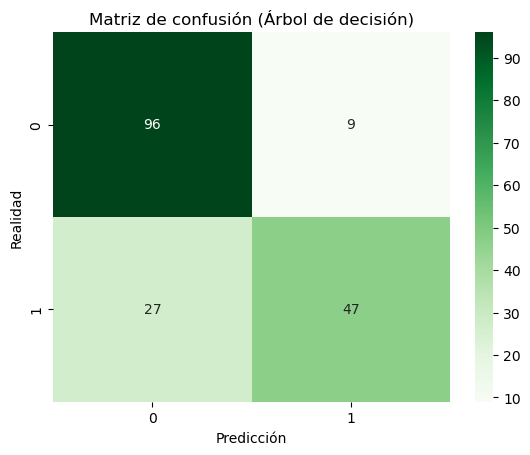

In [27]:
# Visualización de resultados del árbol de decisión
sns.heatmap(confusion_matrix(y_test, y_dt_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de confusión (Árbol de decisión)")
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.show()

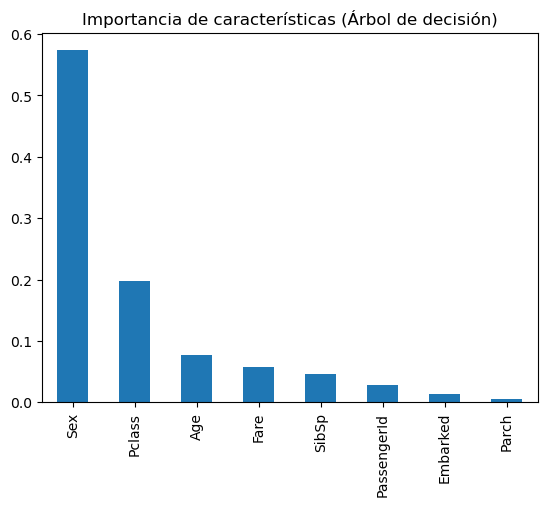

In [28]:
# Importancia de características para el árbol de decisión
dt_feature_importance = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)
dt_feature_importance.plot(kind='bar', title='Importancia de características (Árbol de decisión)')
plt.show()

In [29]:
print("\nAnálisis completado. Por favor revisa las métricas y gráficas para interpretar el rendimiento.")


Análisis completado. Por favor revisa las métricas y gráficas para interpretar el rendimiento.
